<------------------------------------------------------------------------------------------------------------------------>
IDENTIFICATION DIVISION.
PROGRAM-ID DATACLEAN.
DATE: 11/13/2024 TO 11/16/2024
AUTHOR: CATARINA CORREIA DA COSTA 
STUDENTID: A048002
<------------------------------------------------------------------------------------------------------------------------>

Começo por importar as bibliotecas necessárias como as seguintes: 
pandas e numpy para análise de dados e constituição de dataframe para limpeza de dados.
re para cáclulos que possa precisar para obtenção de mais dados que possam parecer relevantes á investigação.

In [108]:
import pandas as pd
import numpy as np
import re as re
import matplotlib.pyplot as plt
import seaborn as sns

Seguidamente, nos ficheiros que nos foram fornecidos, encontrava-se um ficheiro .txt com details. 
Fiz um pequeno pedaço de código que me pernmitisse ler esse ficheiro e apresentar-me o seu conteúdo (imprimir linhas do mesmo). Achei que não seria por acaso que o mesmo estaria aqui, tanbém fora alvo de conteúdo de dados relevantes.

In [109]:
 # Mostrar txt e mostrar texto nele contido.
try:
    with open("details.txt", "r", encoding="utf-8") as file:  # ficheiro txt a ler
        lines = file.readlines()
    
    # Mostrar as primeiras linhas do ficheiro
        print(lines)
        
except FileNotFoundError:
    print("Error: The file 'details.txt' was not found. Please check the file path.")
except UnicodeDecodeError:
    print("Error: Unable to decode the file. Try specifying a different encoding (e.g., 'utf-8' or 'ISO-8859-1').")
except PermissionError:
    print("Error: Permission denied. Ensure the file is not locked or being used by another program.")

['Description:\n', '\n', 'The sinking of the Titanic is one of the most infamous shipwrecks in history.\n', '\n', 'On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.\n', '\n', 'While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.\n', '\n', 'In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).\n', 'Acknowledgements:\n', '\n', 'This dataset has been referred from Kaggle: https://www.kaggle.com/c/titanic/data.\n', '\n', 'For more details, check also: https://www.kaggle.com/datasets/yasserh/titanic-dataset\n']


Após análise do conteúdo dass linhas encvontro algumas informações qu mais tarde me irão servir para o dataset, tais como:
- número de pessoas que morreram;
- Total de pessoas a bordo.
Feita a busca e o match com a informação a mesma é armazenada em variavel e impressa.

In [110]:
#Informacao retirada do txt 
#total de pessoas a bordo e de mortos
#import re

# Dados obtidos txt anteriormente

description = """
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
"""

# Procurar números relevantes 
died_pattern = r"death of (\d+) out of (\d+) passengers"
match = re.search(died_pattern, description)

if match:
    # Procurar match com a informação relevante 
    died = int(match.group(1))  # Number of people who died
    total = int(match.group(2))  # Total number of people on board

    print(f"Total number of people on board: {total}")
    print(f"Number of people who died: {died}")
else:
    print("Data not found in the text")


Total number of people on board: 2224
Number of people who died: 1502


Para além das informações acima retiradas do texto, podemos encontrar mais informaçã relevante como:
- data do acontecimento
- problema e a descrição do mesmo
- Questão da investigaçãqo
Este pedaço de códgico busca esses elementos e se tiver um match ele guarda em variavel e imprime.

In [111]:
#import pandas as pd

# Dados do ficheiro txt
description = """
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).
"""

# Extração da data,do problema e da questão de investigação
date = "April 15, 1912"
Problem= "RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board,"
question_of_study = "What sorts of people were more likely to survive the sinking of the RMS Titanic?"

# Definir os dados em forma de dicionário
data = {
    'Date': [date],
    'Problem':[Problem],
    'Question_of_Study': [question_of_study]
}

# Criar  DataFrame
df = pd.DataFrame(data)

# Apresentar  DataFrame
print(df)


             Date                                            Problem  \
0  April 15, 1912  RMS Titanic sank after colliding with an icebe...   

                                   Question_of_Study  
0  What sorts of people were more likely to survi...  


Com o ficheiro dataset de origem começo por ler o mesmo e imprimir as primeiras linhas para ver como está organizado.

WORKING-STORAGE SECTION.

In [112]:
# ler csv e mostrar algumsas linhas 

#import pandas as pd 

df = pd.read_csv("Titanic-Dataset - copia.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Peço para me listar todas as variáveis do dataset

DATA DIVISION.

In [113]:
#variaveis do dataset
#import pandas as pd

# Ler dataset 
df = pd.read_csv('Titanic-Dataset - copia.csv')

# Apresentar o nome das colunas (variaveis)
print("Variables in the dataset:", df.columns)


Variables in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Peço também os tipos de dados que as colunas têm para saber se estão corretos os valores introduzidos.

In [114]:
print("Column data types:\n", df.dtypes) # msostrar tipos de dados das coluinas


Column data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Peço informação completa do dataset para ver por onde começo a limpar (valores nulos,memória,número de colunas e linhas total).


       PROCEDURE DIVISION.

In [115]:
print(df.info())  #mostrar toda a informação da tabela 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Começo a limpeza de dados pela contagem de valores nulos e onde eles se encontram na tabela, para decidir o que fazer com cada uma das clolunas.

In [116]:
#Nan and null what i do?
#import pandas as pd

# Ler dataset
# df = pd.read_csv('Titanic-Dataset - copia.csv')

# Contar os valores omissos em cada coluna
nan_counts = df.isna().sum()

# Mostrar quantos valores estão omissos e as colunas a que eles correspondem
print("NaN values per column:")
print(nan_counts[nan_counts > 0])

NaN values per column:
Age         177
Cabin       687
Embarked      2
dtype: int64


Aqui tentei que a ccoluna name fosse dividida em lastname firstname e ao mesmo tempo que na mesma coluna se apagasse espaço em branco a mais, com intuito  de formatar.
Passar survied 1 e not survied 0 para categoria para facilitar a leitura
Adicionei uma coluna de tamanho da familia que ajuda a entender quantas famílias completas iam na viagem e quantos da família sobreviveram (cálculos ainda a realizar).


In [117]:
#import pandas as pd
#import numpy as np

# ler dataet
#df = pd.read_csv("Titanic-Dataset - copia.csv")

#Apresentar o dataframe inicial
print("Original DataFrame:\n", df.head())

# split name em lastname e firstname

df[['LastName', 'FirstName']] = df['Name'].str.split(',', expand=True)
#limpar espaços em branco extra

df['FirstName'] = df['FirstName'].str.strip()

#conerter survived coluna em categorias para ser mais simples em vez de 0 e 1

df['Survived'] = df['Survived'].map({1: 'Survived', 0: 'Did not survive'})

#Adicionar a coluna tamanho da família para saber quantas pessoas eram da mesma família

if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
else:
    print("Error: 'SibSp' or 'Parch' column is missing, cannot compute 'FamilySize'.")
    
# Mostrar as alterações feitas no dataframe
print("\nTransformed DataFrame:\n", df.head())

Original DataFrame:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

Neste passo, fiz uma contagem de nulls, ou seja, valores nan e none em todo o dataset e que me identificasse em que colunas estva presente esse valor e quantos.

In [118]:
# Contagem dos valores nulos (None, NAN)
# leitura do CSV 
#df = pd.read_csv('Titanic-Dataset - copia.csv')

# Contagem  NaN/None valores em cada coluna

nan_count_per_column = df.isna().sum()

# Contagem dos  NaN/None valores em todo o  DataFrame

nan_count_total = df.isna().sum().sum()

# Mostrar as contagens 

print("NaN/None values per column:")
print(nan_count_per_column)

print("\nTotal NaN/None values in the DataFrame:", nan_count_total)



NaN/None values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
LastName         0
FirstName        0
FamilySize       0
dtype: int64

Total NaN/None values in the DataFrame: 866


Segundo a tabela acima temos valores nulos nas seguintes tabela:
-Age 
-Embarked
- Cabin
Momento de decisões...... hummmm que faço?
Ora bem, o mais pequeno embarked posso ir pelo valor mais frequente (mode).
Age temos dois problemas tem o datatype errado float podemos ver mais acima e tem valores nulos.
Como quero resolver ambos os problemas (passar a integer e usar a mediana para completar os nulls)
cabin? pois esse vai ser mais difícil, mais adiante um de cada vez ou talvez dois

In [119]:
#import pandas as pd

# Ler ficheiro CSV
#df = pd.read_csv('Titanic-Dataset - copia.csv')

#´Preencher valores omissos em Age com a média e converter em número inteiro

df['Age'] = df['Age'].fillna(df['Age'].median()).round().astype(int)

#Preencher valores omissos em Embarked com mode (valor mais frequente)

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

#Verificar se aiinda existem valres omissos

print("\nMissing values after handling:")
print(df.isna().sum())


#Mostrar novo dataframe com as alterações

print("\nUpdated DataFrame:")
print(df.head())






Missing values after handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
LastName         0
FirstName        0
FamilySize       0
dtype: int64

Updated DataFrame:
   PassengerId         Survived  Pclass  \
0            1  Did not survive       3   
1            2         Survived       1   
2            3         Survived       3   
3            4         Survived       1   
4            5  Did not survive       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4          

Preciso que me mostre todos os null de cabin para serem resolvidos

In [120]:
#NULL na coluna cabin

df[df['Cabin'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,FamilySize
0,1,Did not survive,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,2
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,1
4,5,Did not survive,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,1
5,6,Did not survive,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,1
7,8,Did not survive,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,5
8,9,Survived,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),3
9,10,Survived,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),2
12,13,Did not survive,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,NaN,S,Saundercock,Mr. William Henry,1
13,14,Did not survive,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.2750,NaN,S,Andersson,Mr. Anders Johan,7
14,15,Did not survive,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,NaN,S,Vestrom,Miss. Hulda Amanda Adolfina,1


Para resolver o problema da cabin ter valores nulos decidi recorrer ao ticket. Este é composto normalmente por uma letra e um conjunto de números, a letra corresponde ao deck e á cabine. Tenho uma lista anterior dos decks válidos e vou transformar o bilhete (ticket) em string e verificar se a letra extraida  corresponde com um deck válido. Caso simm, preenche deck+cabin, caso não fica os dados do bilhete.
Apago a coluna ticket-deck que usei na correspondência e imprimo o dataframe atualizado.

In [121]:

#import pandas as pd

# Leitura do csv
#df = pd.read_csv('Titanic-Dataset - copia.csv')

# Transformação da coluna Ticket em string 
df['Ticket'] = df['Ticket'].astype(str)

# Extrair a primeira letra que corresponda com o deck e colocar em maiuscula 
df['Ticket_Deck'] = df['Ticket'].str[0].str.upper()

# Verificar se corresponde a um deck
valid_decks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
df['Ticket_Deck'] = df['Ticket_Deck'].apply(lambda x: x if x in valid_decks else None)

# Preencher com o valor do ticket em caso de ser inválido ou não existir
df['Cabin'] = df['Cabin'].fillna(df['Ticket_Deck'])

df.drop(columns=['Ticket_Deck'], inplace=True)

# Mostrar dataframe atualizado
print(df)

#Vou verificar se ainda existem valores nulos nessa coluna
print(df['Cabin'].isnull().sum())


     PassengerId         Survived  Pclass  \
0              1  Did not survive       3   
1              2         Survived       1   
2              3         Survived       3   
3              4         Survived       1   
4              5  Did not survive       3   
5              6  Did not survive       3   
6              7  Did not survive       1   
7              8  Did not survive       3   
8              9         Survived       3   
9             10         Survived       2   
10            11         Survived       3   
11            12         Survived       1   
12            13  Did not survive       3   
13            14  Did not survive       3   
14            15  Did not survive       3   
15            16         Survived       2   
16            17  Did not survive       3   
17            18         Survived       2   
18            19  Did not survive       3   
19            20         Survived       3   
20            21  Did not survive       2   
21        

Devido á existência de muitos valores nulos, mesmo após a ajuda dada pelo ticket, optei por passar a unknown esses valores para não perder as linhas na eliminação de dados. Assim, passam a não contabilizados.

In [122]:

#Substitui NAN and NONE for Unknown

#import pandas as pd

# Ler o csv
#df = pd.read_csv('Titanic-Dataset - copia.csv')

# Substituir NaN  na coluna  'Cabin' por 'Unknown'
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Passar todos os elementos as maíusculas
df['Cabin'] = df['Cabin'].apply(lambda x: x.upper())

print("\nDataFrame after filling NaN values and transforming 'Cabin':")
print(df.head())




DataFrame after filling NaN values and transforming 'Cabin':
   PassengerId         Survived  Pclass  \
0            1  Did not survive       3   
1            2         Survived       1   
2            3         Survived       3   
3            4         Survived       1   
4            5  Did not survive       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare    Cabin Embarked   LastName  \
0      0         A/5 21171   7.2500        A        S     Braund   
1      0          PC 17599  71.2833      C85        C    Cumings   
2      0  STON/O2.

Como podemos verificar, foi utilizado o número de ticket, este é composto por números que indicam o acento e letras correspondem ao deck e este por sua vez corresponde a uma cabine, exemplo   A/5 21171  é a cabine A e o deck A.
Assim,pude preencher alguns dos valores nulos, no entanto, nem todos os números de bilhete possuiam cabine, por isso passaram a none e para não serem contabilizados terei que os passar a unknown e assim completar a deck colum e alterar o dataframe de forma a eliminar nulos sem seleimnar linhas completas.
Porque se as eliminasse perderia outros dados relevantes e este poderá não o ser, mas não perco os restantes eliminando linhas ou a coluna.

In [123]:
#Ignorar UnKnown

# Mostrar primeiras linhas para verificar os dados iniciais

print("Initial DataFrame:")
print(df.head())

#Extrair a primeira letra dos elementos de cabin ignorando (NAN e None)

df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else x)
#A primeira letra de Cabin é considerado o deck 

#A primeira letra de Cabin é considerado o deck 

df['Deck'] = df['Cabin'].str[0]  

#Mostrar as alterações no dataframe

print("\nDataFrame after processing 'Cabin' column:")
print(df.head())



Initial DataFrame:
   PassengerId         Survived  Pclass  \
0            1  Did not survive       3   
1            2         Survived       1   
2            3         Survived       3   
3            4         Survived       1   
4            5  Did not survive       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare    Cabin Embarked   LastName  \
0      0         A/5 21171   7.2500        A        S     Braund   
1      0          PC 17599  71.2833      C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250  UNKNOWN        S  Heikki

Também uma coluna que lista os títulos de cada nome. 
São dados que podem mais tarde explicar a sorte e também o estatuto socio económico do documento ddetails.

In [124]:
#Títulos de famílias -filtrar

def filter_by_titles(titles):
    """
    Filter the global DataFrame to include only rows where the 'Title' column matches the specified titles

    Args:
        titles (list): List of titles to filter (e.g., ['Miss', 'Mr', 'Mrs']).

    Returns:
        pd.DataFrame: A DataFrame containing only rows with the specified titles.
    """
    
    global df
    
    #Extrair títulos de nome
    df['Title'] = df['Name'].str.extract(r'\b(' + '|'.join(titles) + r')\b', expand=True)

    # Restringir-me ás colunas onde se localizam os títtulos = nome
    return df[df['Title'].isin(titles)]

# Lista de títulos a procurar
desired_titles = ['Miss', 'Mr', 'Mrs', 'Dr', 'Master']

#  DataFrame - filtrar e procurar 
filtered_df = filter_by_titles(desired_titles)

# Mostrar os valores retirados do dataframe coluna nome titulo
print(filtered_df[['Name', 'Title']])

                                                  Name   Title
0                              Braund, Mr. Owen Harris      Mr
1    Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                               Heikkinen, Miss. Laina    Miss
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                             Allen, Mr. William Henry      Mr
5                                     Moran, Mr. James      Mr
6                              McCarthy, Mr. Timothy J      Mr
7                       Palsson, Master. Gosta Leonard  Master
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                  Nasser, Mrs. Nicholas (Adele Achem)     Mrs
10                     Sandstrom, Miss. Marguerite Rut    Miss
11                            Bonnell, Miss. Elizabeth    Miss
12                      Saundercock, Mr. William Henry      Mr
13                         Andersson, Mr. Anders Johan      Mr
14                Vestrom, Miss. Hulda Amanda Adolfina 

Quis ver todod o dataframe completo

In [125]:
#import pandas as pd
# ver database completo
pd.options.display.max_rows = None
pd.options.display.max_columns=None

#df = pd.read_csv('Titanic-Dataset - copia.csv')

print(df) 


     PassengerId         Survived  Pclass  \
0              1  Did not survive       3   
1              2         Survived       1   
2              3         Survived       3   
3              4         Survived       1   
4              5  Did not survive       3   
5              6  Did not survive       3   
6              7  Did not survive       1   
7              8  Did not survive       3   
8              9         Survived       3   
9             10         Survived       2   
10            11         Survived       3   
11            12         Survived       1   
12            13  Did not survive       3   
13            14  Did not survive       3   
14            15  Did not survive       3   
15            16         Survived       2   
16            17  Did not survive       3   
17            18         Survived       2   
18            19  Did not survive       3   
19            20         Survived       3   
20            21  Did not survive       2   
21        

Vamos começar por verificar e eliminar duplicados

In [126]:
# Duplicados
print(df.duplicated())
df.drop_duplicates(inplace = True)


0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [22]:
#Read datatypes origin 
print(df.dtypes)


PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
LastName        object
FirstName       object
FamilySize       int64
Deck            object
Title           object
dtype: object


Ler datatypes e modificar para poder ter definido os tipos por colunas. 

In [127]:
#import pandas as pd
# Mudar os datatypes
# Ler dataset e mostrar datatypes atuais
#df = pd.read_csv('Titanic-Dataset - copia.csv')
print("Original Data Types:")
print(df.dtypes)

# Redefinição de datatypes
df = df.astype({
    'Pclass': 'int8',      
    'Age': 'int8',      
    'SibSp': 'int8',    
    'Parch': 'int8',       
    'Fare': 'float32',     
    'Sex': 'category',     
    'Embarked': 'category' 
})

# Verificar
print("\nRedefined Data Types:")
print(df.dtypes)

# Guardar na memória
print("\nMemory Usage (Reduced):")
print(df.memory_usage(deep=True))




Original Data Types:
PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
LastName        object
FirstName       object
FamilySize       int64
Deck            object
Title           object
dtype: object

Redefined Data Types:
PassengerId       int64
Survived         object
Pclass             int8
Name             object
Sex            category
Age                int8
SibSp              int8
Parch              int8
Ticket           object
Fare            float32
Cabin            object
Embarked       category
LastName         object
FirstName        object
FamilySize        int64
Deck             object
Title            object
dtype: object

Memory Usage (Reduced):
Index            132
PassengerId     7128
Survived       54630
Pclass           891
Name           67685

In [24]:
#Imprimir toda a informação da tabela 
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
dtypes: category(2), float32(1), int64(2), int8(4), object(8)
memory usage: 78

Formatar Strings para elas ficarem uniformes.

In [128]:
#format strings

df['Name'] = df['Name'].str.title() 
df['Sex'] = df['Sex'].str.lower()
df['Cabin'] = df['Cabin'].str.title()
df['Ticket'] = df['Ticket'].str.title() 
print(df)


     PassengerId         Survived  Pclass  \
0              1  Did not survive       3   
1              2         Survived       1   
2              3         Survived       3   
3              4         Survived       1   
4              5  Did not survive       3   
5              6  Did not survive       3   
6              7  Did not survive       1   
7              8  Did not survive       3   
8              9         Survived       3   
9             10         Survived       2   
10            11         Survived       3   
11            12         Survived       1   
12            13  Did not survive       3   
13            14  Did not survive       3   
14            15  Did not survive       3   
15            16         Survived       2   
16            17  Did not survive       3   
17            18         Survived       2   
18            19  Did not survive       3   
19            20         Survived       3   
20            21  Did not survive       2   
21        

Vamos verificar as primeiras linhas para ver se ficou com a formatação pretendida

In [129]:
#Imprimir algumas linhas 
#import pandas as pd
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,FamilySize,Deck,Title
0,1,Did not survive,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.250000,A,S,Braund,Mr. Owen Harris,2,A,Mr
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,Pc 17599,71.283302,C,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),2,C,Mrs
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26,0,0,Ston/O2. 3101282,7.925000,U,S,Heikkinen,Miss. Laina,1,U,Miss
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.099998,C,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),2,C,Mrs
4,5,Did not survive,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.050000,U,S,Allen,Mr. William Henry,1,U,Mr


Outro dado que considero importante para a investigação é saber qual era o número total de passageiros do Titanic

In [130]:
#import pandas as pd
#Número de passageiros 
#  Ler o csv dataset
# df = pd.read_csv('Titanic-Dataset - copia.csv')

# Calcular o total de passageiros do navio
total_passengers = len(df)
print(f"Total number of passengers on board: {total_passengers}")



Total number of passengers on board: 891


Também pretendo saber quantos tripulantes iriam abordo do mesmo navio

In [131]:
#Número de tripulantes
total_crew =total - total_passengers
print(total_crew)

1333


O dado mais curioso foi calcular a taxa de sobrevivência tebdo por base todos os dados do dataset e o número de pessoas abordo dado pelo documento texto e saber que era muito baixa a probabilidade de sobreviência.

In [132]:
# Calcular taxa de sobrevivencia 
#df = pd.read_csv('Titanic-Dataset-Copy1.csv')


count_survive = df['Survived'].str.count('Survive').sum()


total_rows = len(df)

percentage_survive = (count_survive / total_rows) * 100


print(f"Count of 'Survive': {count_survive}")
print(f"Percentage of 'Survive': {percentage_survive:.2f}%")


count_survive = df['Survived'].str.count('Survive').sum()

Count of 'Survive': 342
Percentage of 'Survive': 38.38%


<--------------------------------------- SEGUNDA PARTE - VISUALIZAÇÃO E ANÀLISE --------------------------------->

In [158]:
#Títulos de famílias -filtrar

def filter_by_titles(titles):
    """
    Filter the global DataFrame to include only rows where the 'Title' column matches the specified titles

    Args:
        titles (list): List of titles to filter (e.g., ['Miss', 'Mr', 'Mrs']).

    Returns:
        pd.DataFrame: A DataFrame containing only rows with the specified titles.
    """
    
    global df
    
    #Extrair títulos de nome
    df['Title'] = df['Name'].str.extract(r'\b(' + '|'.join(titles) + r')\b', expand=True)

    # Restringir-me ás colunas onde se localizam os títtulos = nome
    return df[df['Title'].isin(titles)]

# Lista de títulos a procurar
desired_titles = ['Miss', 'Mr', 'Mrs', 'Dr', 'Master']

#  DataFrame - filtrar e procurar 
filtered_df = filter_by_titles(desired_titles)

# Mostrar os valores retirados do dataframe coluna nome titulo
print(filtered_df[['Name', 'Title']])

                                                  Name   Title
0                              Braund, Mr. Owen Harris      Mr
1    Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                               Heikkinen, Miss. Laina    Miss
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                             Allen, Mr. William Henry      Mr
5                                     Moran, Mr. James      Mr
6                              Mccarthy, Mr. Timothy J      Mr
7                       Palsson, Master. Gosta Leonard  Master
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                  Nasser, Mrs. Nicholas (Adele Achem)     Mrs
10                     Sandstrom, Miss. Marguerite Rut    Miss
11                            Bonnell, Miss. Elizabeth    Miss
12                      Saundercock, Mr. William Henry      Mr
13                         Andersson, Mr. Anders Johan      Mr
14                Vestrom, Miss. Hulda Amanda Adolfina 

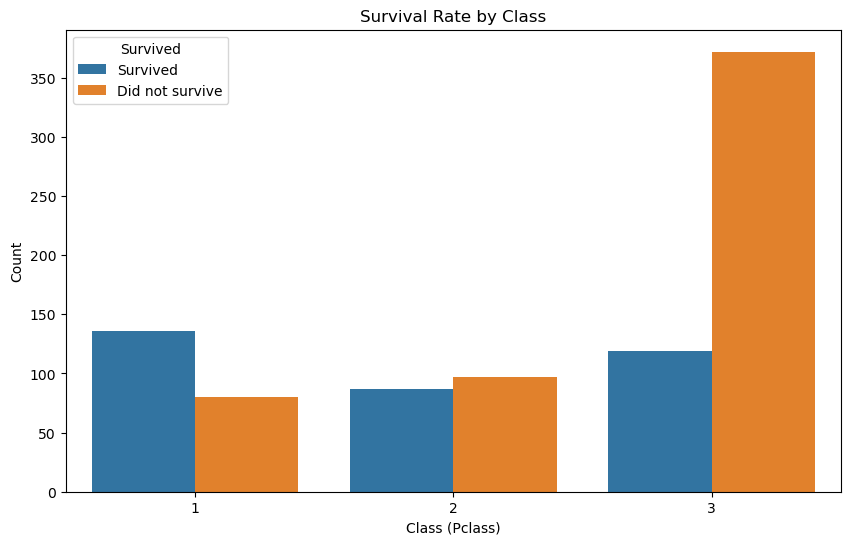

In [137]:
import seaborn as sns
# Plot survival rate by Class
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Rate by Class')
plt.xlabel('Class (Pclass)')
plt.ylabel('Count')
plt.show()


In [138]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

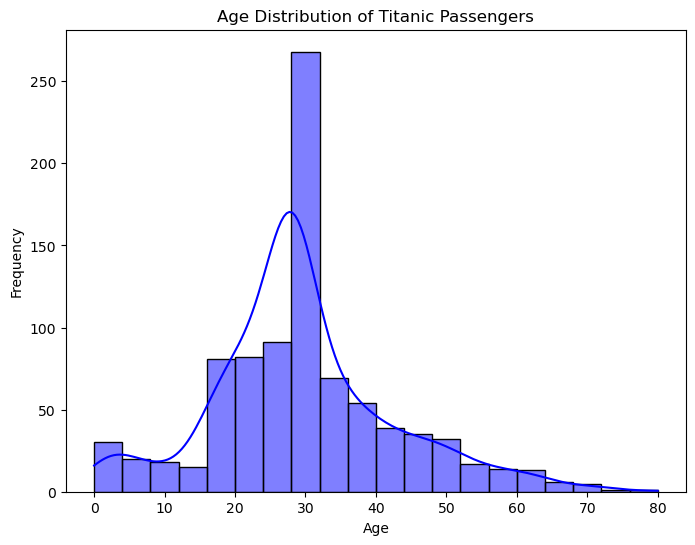

In [139]:

# Plot the distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [140]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

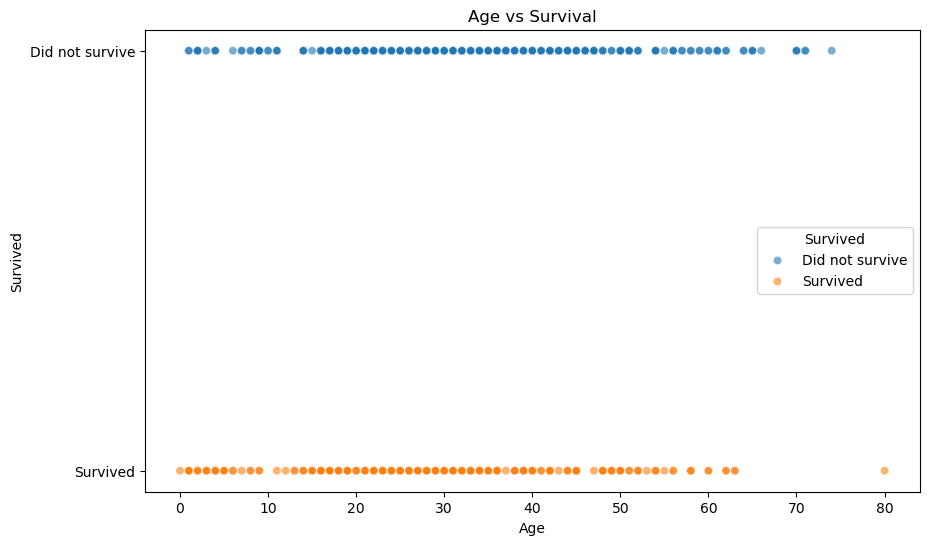

In [141]:
# Scatter plot of Age vs Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Survived', hue='Survived', alpha=0.6)
plt.title('Age vs Survival')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()


In [142]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

In [145]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

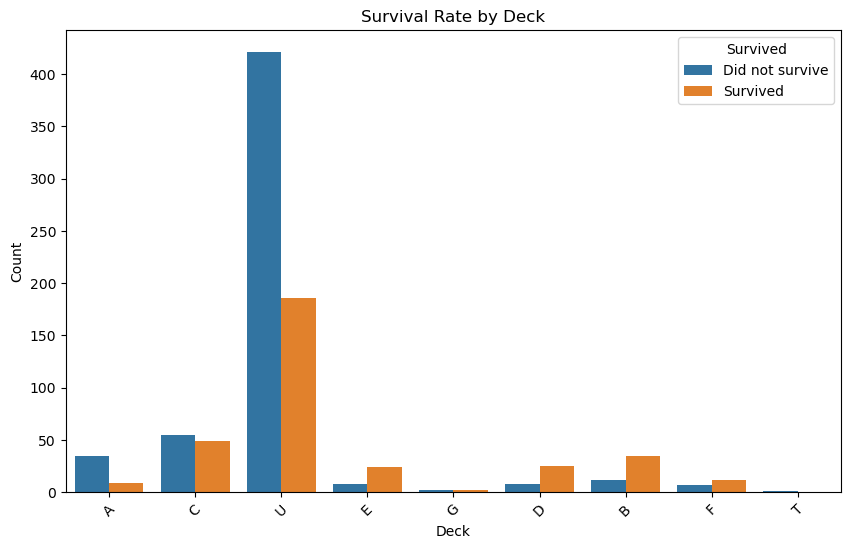

In [147]:
# Extract Deck information from Cabin
df['Deck'] = df['Cabin'].str[0]

# Plot survival rate by deck
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Deck', hue='Survived')
plt.title('Survival Rate by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [148]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

In [149]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,FirstName,FamilySize,Deck,Title,Has_Title
0,1,Did not survive,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.250000,A,S,Braund,Mr. Owen Harris,2,A,Mr,True
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,Pc 17599,71.283302,C,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),2,C,Mrs,True
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26,0,0,Ston/O2. 3101282,7.925000,U,S,Heikkinen,Miss. Laina,1,U,Miss,True
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.099998,C,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),2,C,Mrs,True
4,5,Did not survive,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.050000,U,S,Allen,Mr. William Henry,1,U,Mr,True


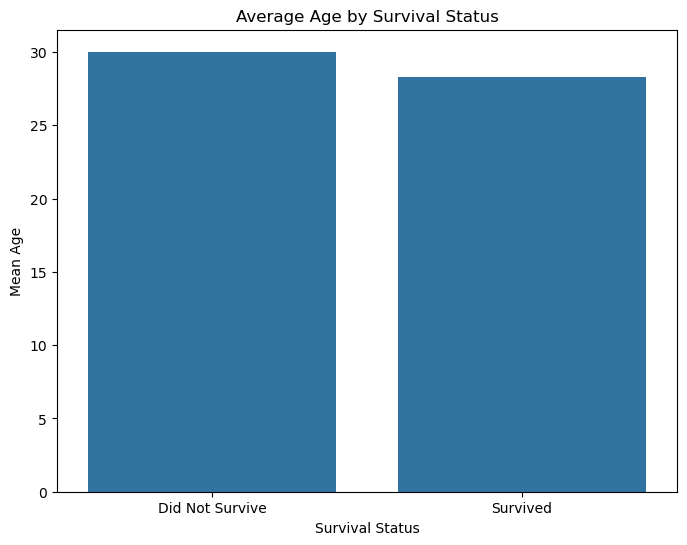

In [150]:
# Group the data by 'Survived' and calculate the mean age for each group
mean_age_by_survival = df.groupby('Survived')['Age'].mean()

# Plot the bar chart for Mean Age by Survival Status
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_age_by_survival.index, y=mean_age_by_survival.values)

# Customize the plot
plt.title('Average Age by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Mean Age')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])  # Customize x-ticks for clarity

# Show the plot
plt.show()


In [151]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

In [153]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

<Figure size 1000x600 with 0 Axes>

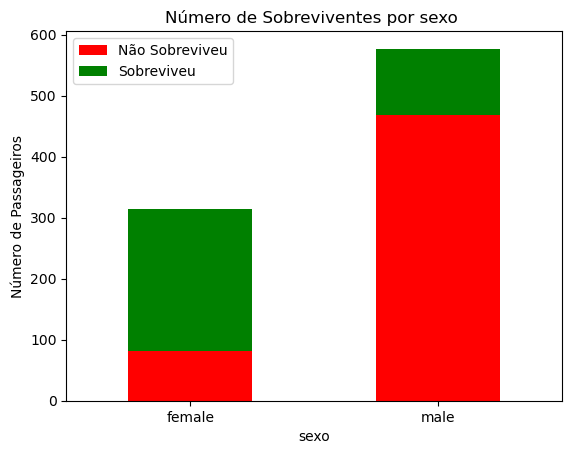

In [156]:
# Contar o número de sobreviventes e não sobreviventes por gênero
survival_by_sex = df.groupby(['Sex', 'Survived']).size().unstack()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
survival_by_sex.plot(kind='bar', stacked=True, color=['red', 'green'])

# Personalizar o gráfico
plt.title('Número de Sobreviventes por sexo ')
plt.xlabel('sexo')
plt.ylabel('Número de Passageiros')
plt.xticks(rotation=0)  # Não girar os rótulos do eixo x
plt.legend(['Não Sobreviveu', 'Sobreviveu'])

# Mostrar o gráfico
plt.show()


In [157]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int64   
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

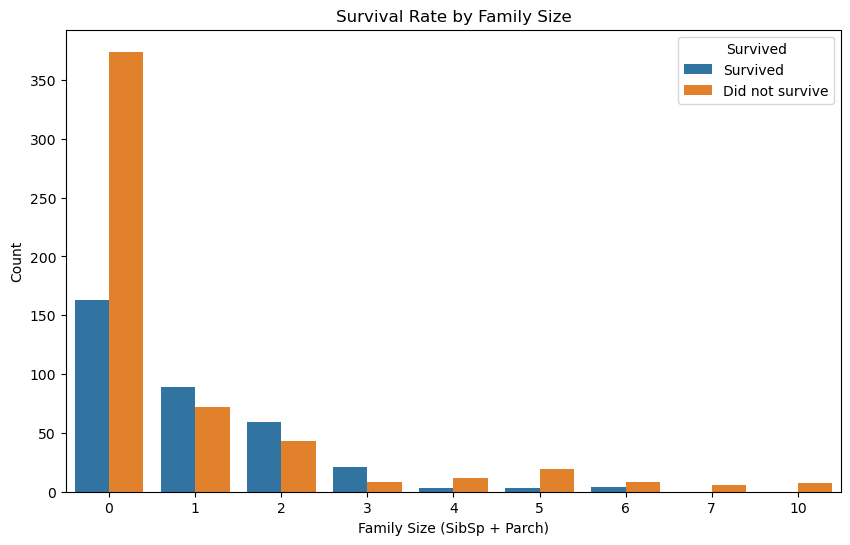

In [159]:
# Create a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Plot survival rate by Family Size
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FamilySize', hue='Survived')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.show()


In [160]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int8    
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

In [161]:
matrix


ValueError: could not convert string to float: 'Did not survive'

In [162]:
# Estatísticas para Idade
mean_age = df["Age"].mean()
median_age = df["Age"].median()
std_age = df["Age"].std()

print(f"Média da idade: {mean_age:.2f}")
print(f"Mediana da idade: {median_age:.2f}")
print(f"Desvio padrão da idade: {std_age:.2f}")


Média da idade: 29.36
Mediana da idade: 28.00
Desvio padrão da idade: 13.02


In [163]:
print(df.info())  #mostrar toda a informação da tabela 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    object  
 2   Pclass       891 non-null    int8    
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    int8    
 6   SibSp        891 non-null    int8    
 7   Parch        891 non-null    int8    
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float32 
 10  Cabin        891 non-null    object  
 11  Embarked     891 non-null    category
 12  LastName     891 non-null    object  
 13  FirstName    891 non-null    object  
 14  FamilySize   891 non-null    int8    
 15  Deck         891 non-null    object  
 16  Title        874 non-null    object  
 17  Has_Title    891 non-null    bool    
dtypes: bool(1), category(1), float

Machine learning

In [90]:
# Mean
mean_survived = df['Survived'].mean()

# Median
median_survived = df['Survived'].median()

# Standard Deviation
std_dev_survived = df['Survived'].std()

print(f"Mean: {mean_survived}")
print(f"Median: {median_survived}")
print(f"Standard Deviation: {std_dev_survived}")


Mean: 0.5
Median: 0.5
Standard Deviation: 0.5477225575051661


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and target variable
X = df.drop(columns=['Survived'])  # Assuming 'Survived' is the target variable
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model (RandomForest as an example)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy}")


Para terminar é feita uma última verificação aos valores e a existência de valores nulos e da sua ocupação em memória. 
Verificamos que só a coluna dos títulos familiaresn contém valores nulos. 
É feita a gravação de um novo ficheiro csv com o nome definido. 

<------------------------------------------------------------------------------------------------------------------------>
É apresentada a confirmação de gravação do mesmo e de duas mensagens com algum humor no final.
Considerações foi divertido este jogo de lógica e procura de padrões. 
<------------------------------------------------------------------------------------------------------------------------>

In [30]:
#Verificar se existem valores nulos e gravar novo CSV
print("\nMissing values after handling:")
print(df.isna().sum())


output_csv_path = "cleaned_datah0k.csv"  
df.to_csv(output_csv_path, index=False)

#Confirmar a gravação
print(f"Cleaned data saved to {output_csv_path}")
print("I turn MSUD 2 to code")
print("stop run")


Missing values after handling:
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
LastName        0
FirstName       0
FamilySize      0
Deck            0
Title          17
dtype: int64
Cleaned data saved to cleaned_datah0k.csv
I turn MSUD 2 to code
stop run
